# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [115]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [116]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [117]:
data.shape

(5391, 6)

In [118]:
data.isna().any().sum()

0

In [119]:
data.duplicated().sum()

0

In [120]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [122]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [123]:
data.USD_Production_Budget=data.USD_Production_Budget.astype(str).str.replace(',', "")
data.USD_Production_Budget=data.USD_Production_Budget.astype(str).str.replace('$', "",regex=True)
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,"$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,385907,$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,"$22,000,000","$11,000,000"


In [124]:
data.USD_Worldwide_Gross=data.USD_Worldwide_Gross.astype(str).str.replace(',', "")
data.USD_Worldwide_Gross=data.USD_Worldwide_Gross.astype(str).str.replace('$', "",regex=True)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,"$10,000,000"
1,5140,5/9/1916,Intolerance,385907,0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,"$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,"$3,000,000"
4,5222,1/1/1925,The Big Parade,245000,22000000,"$11,000,000"


In [125]:
data.USD_Domestic_Gross=data.USD_Domestic_Gross.astype(str).str.replace(',', "")
data.USD_Domestic_Gross=data.USD_Domestic_Gross.astype(str).str.replace('$', "",regex=True)
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [126]:
type(data['Release_Date'][1])

str

In [127]:
data.Release_Date=pd.to_datetime(data.Release_Date)

### Data Type Conversions

In [128]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])


/var/folders/sg/w_bg51ts7b5bbnpkmwnftddm0000gn/T/ipykernel_7353/1667972235.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [129]:
data.Release_Date=pd.to_datetime(data.Release_Date)

### Descriptive Statistics

In [130]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [131]:
#Lowest budgeted film
data[data.USD_Production_Budget==1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [132]:
#Higest budget film
data[data.USD_Production_Budget==425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [133]:
data.sort_values('USD_Production_Budget')[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0
1209,5387,1999-02-04,Following,6000,240495,48482


In [134]:
data.sort_values('USD_Production_Budget',ascending=False)[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115


# Investigating the Zero Revenue Films

In [135]:
data[data.USD_Domestic_Gross==0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [136]:
flop_movie=data[data.USD_Worldwide_Gross==0]

In [137]:
flop_movie.sort_values('USD_Production_Budget',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. 
But what if we want to select our data based on more than one condition?
For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), 
but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

How would we create a filter for these two conditions? 
One approach is to use the .loc[] property combined with the bitwise and & operator.



In [138]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [139]:
international_releases.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [140]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [141]:
future_release=data[data.Release_Date >= scrape_date]
future_release

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [142]:
data_clean=data.drop(future_release.index)

### Films that Lost Money



In [143]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [144]:
#calculating percent of the film losing money
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)
#has show below the film lossing money is 37.2%

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

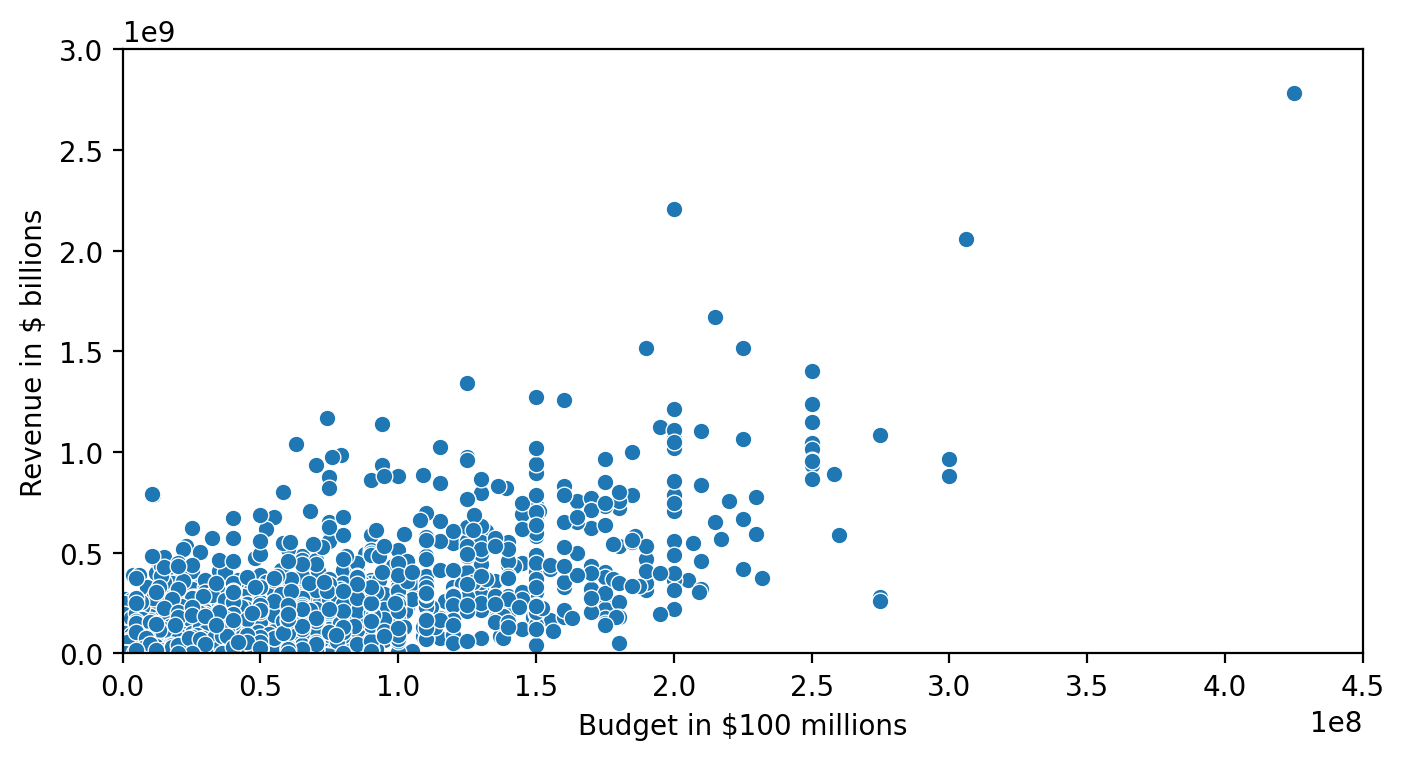

In [145]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

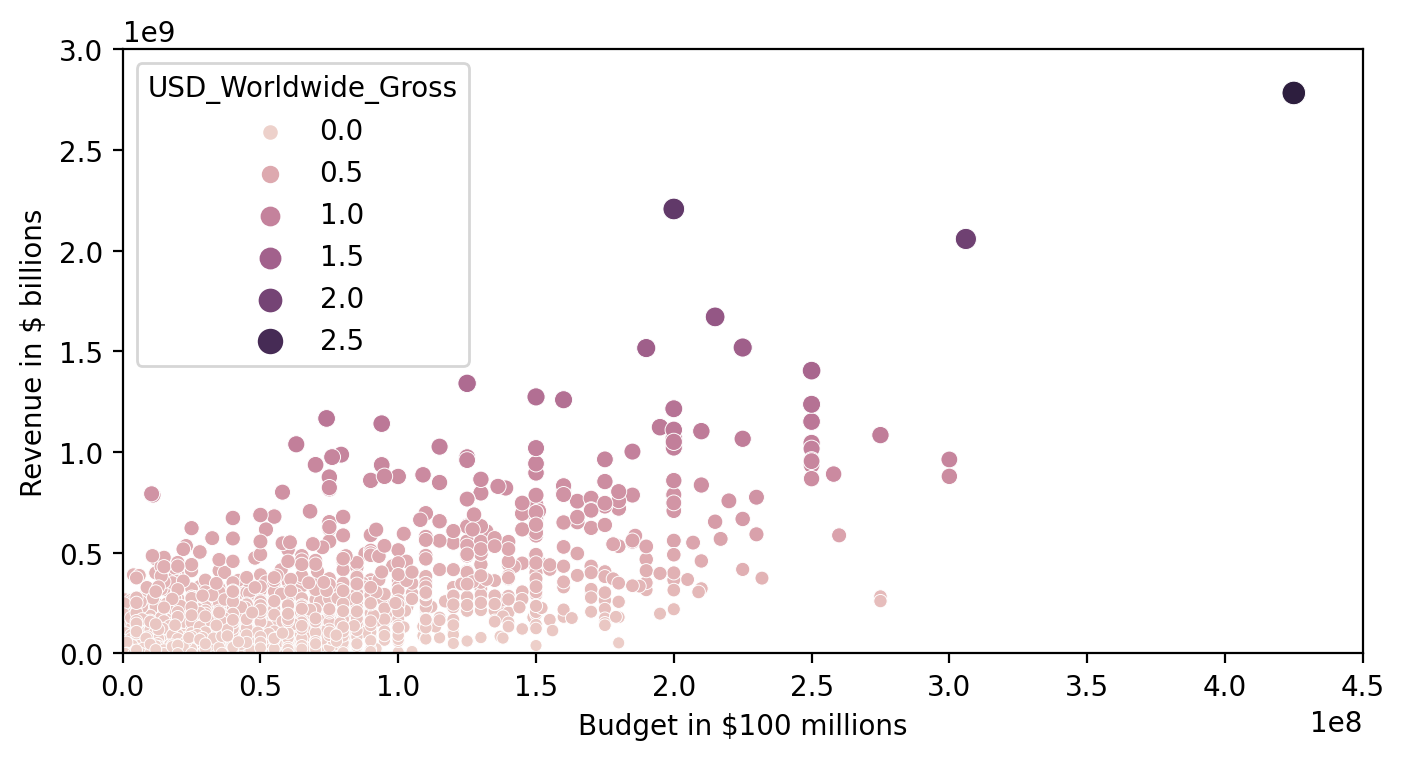

In [146]:
#But the reason we're using Seaborn is because of the hue and size parameters
#that make it very easy to create a bubble chart. These parameters allow us to colour the data and change
#their size according to one of the columns in our DataFrame.
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

### Plotting Movie Releases over Time






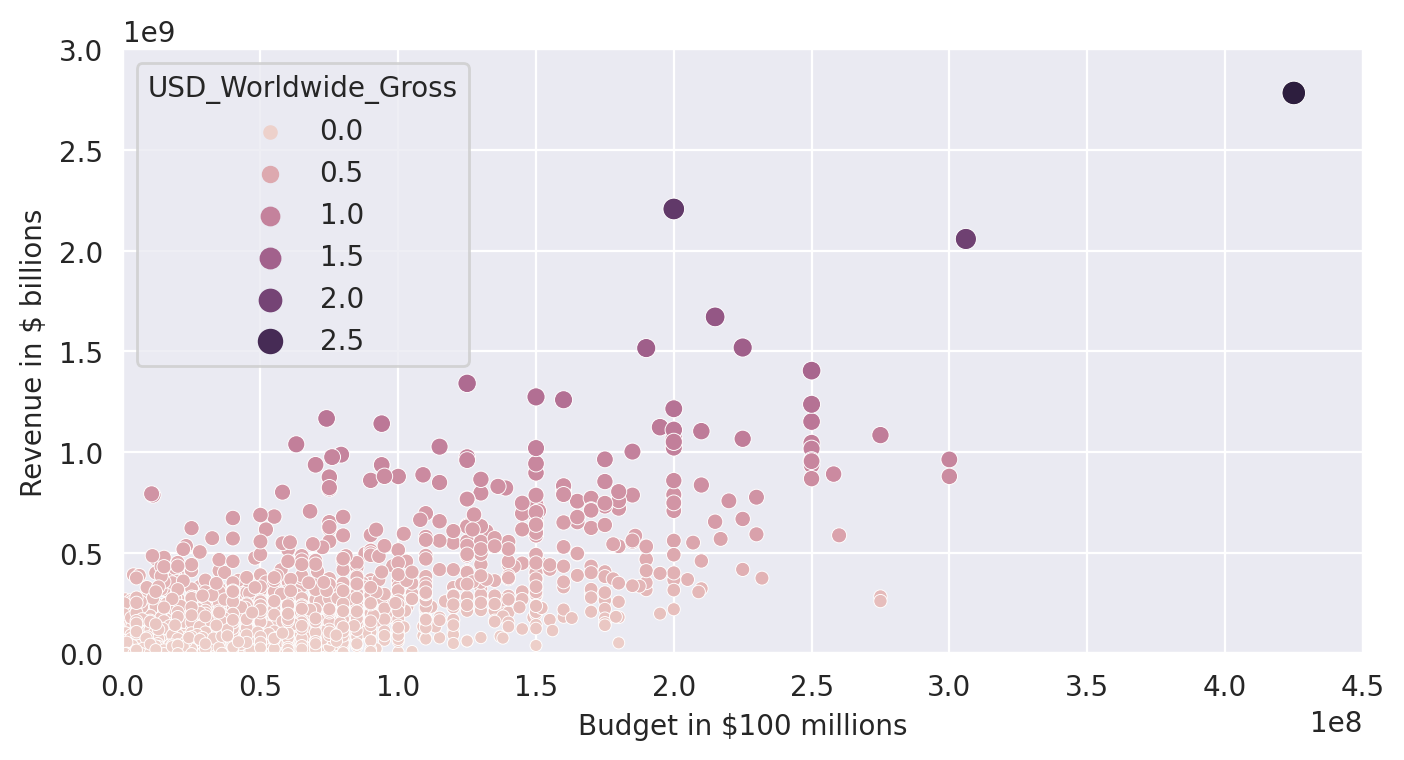

In [147]:
#Now our higher grossing movies are bigger and darker on our chart. 
#That's super handy. But Seaborn offers a number of convenient styling options as well.

#To set the styling on a single chart (as opposed to all the charts in the entire notebook)
#we can use Python's with keyword. 
#We've seen with used already when it comes to opening files in previous lessons.
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

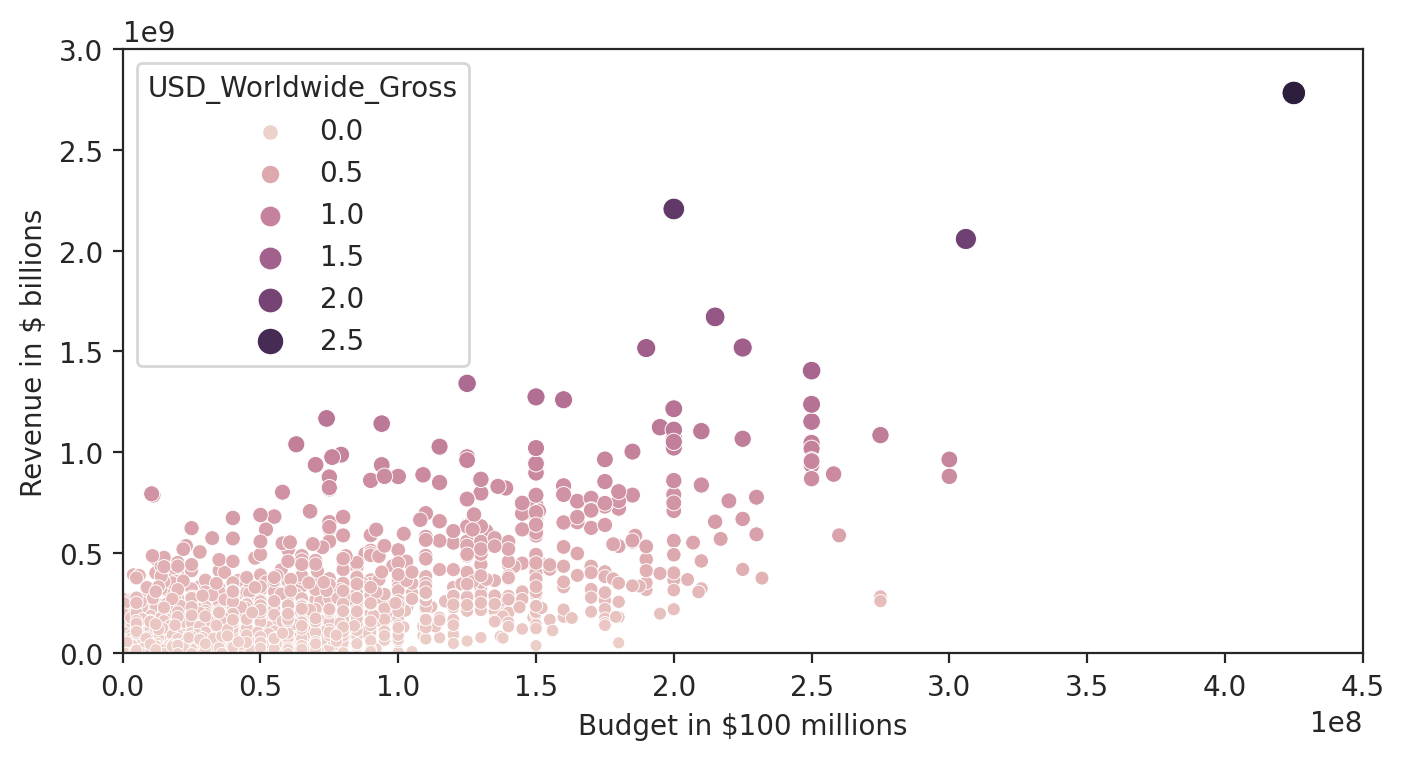

In [148]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('ticks'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

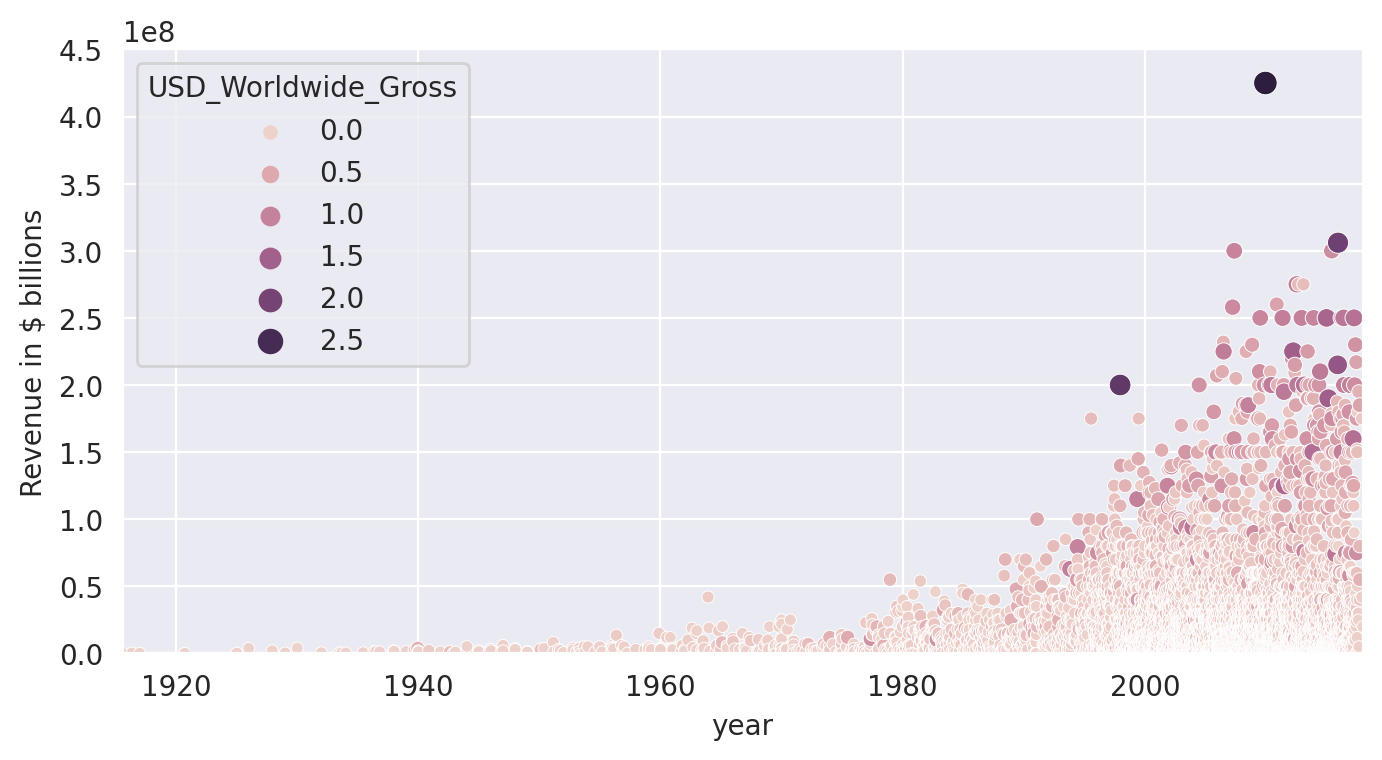

In [149]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross',)
 
  ax.set(ylim=(0, 450000000),
      xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        xlabel='year',
        ylabel='Revenue in $ billions')

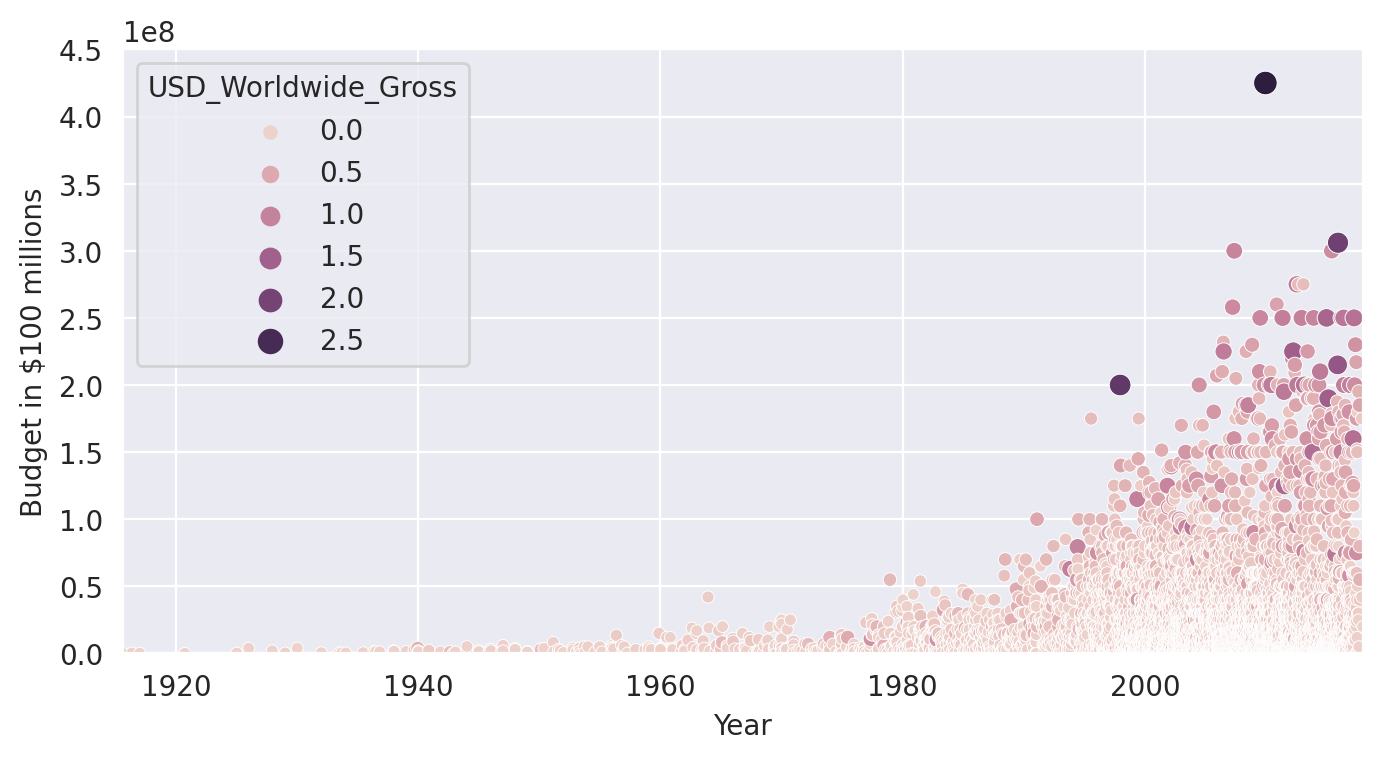

In [150]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

#What do we see here? What is this chart telling us? Well, first off, 
#movie budgets have just exploded in the last 40 years or so. 
#Up until the 1970s, the film industry appears to have been in an entirely different era.
#Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s.
#Also, the industry has grown massively, producing many more films than before. 
#The number of data points is so dense from 2000 onwards that they are overlapping.

In [155]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In our case, we will use the floor division by 10 and then multiplication by 10 to convert
the release year to the release decade:
example 1999//10=199
199*10=1990

In [157]:
#We can do this for all the years and then add the decades back as a column.
decades = years//10*10
data_clean['Decade'] = decades
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films



In [158]:
remove_old_date = pd.Timestamp('1969-12-31')

In [163]:
old_films=data[data.Release_Date <= remove_old_date]

In [161]:
#new_films should include all the films from 1970 onwards
new_films=data[data.Release_Date >= remove_old_date]

In [162]:
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
153,2159,1970-01-01,Waterloo,25000000,0,0
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000
155,3136,1970-01-01,Patton,12000000,62500000,62500000
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [169]:
#How many films were released prior to 1970?
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41"
min,"1,253.00","100,000.00",0.00,0.00
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00"


In [171]:
#What was the most expensive film made prior to 1970?
old_films.sort_values('USD_Production_Budget',ascending=False)[:1]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000


In [168]:
#What was the most expensive film made prior to 1970?

42000000

# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

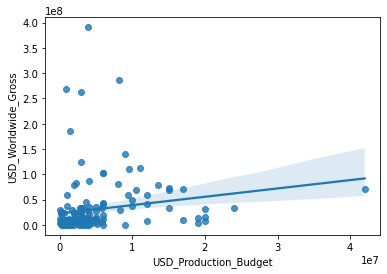

In [172]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again, drop into the Matplotlib layer and 
supply keyword arguments as dictionaries. We can customise the scatter plot (e.g.,
by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

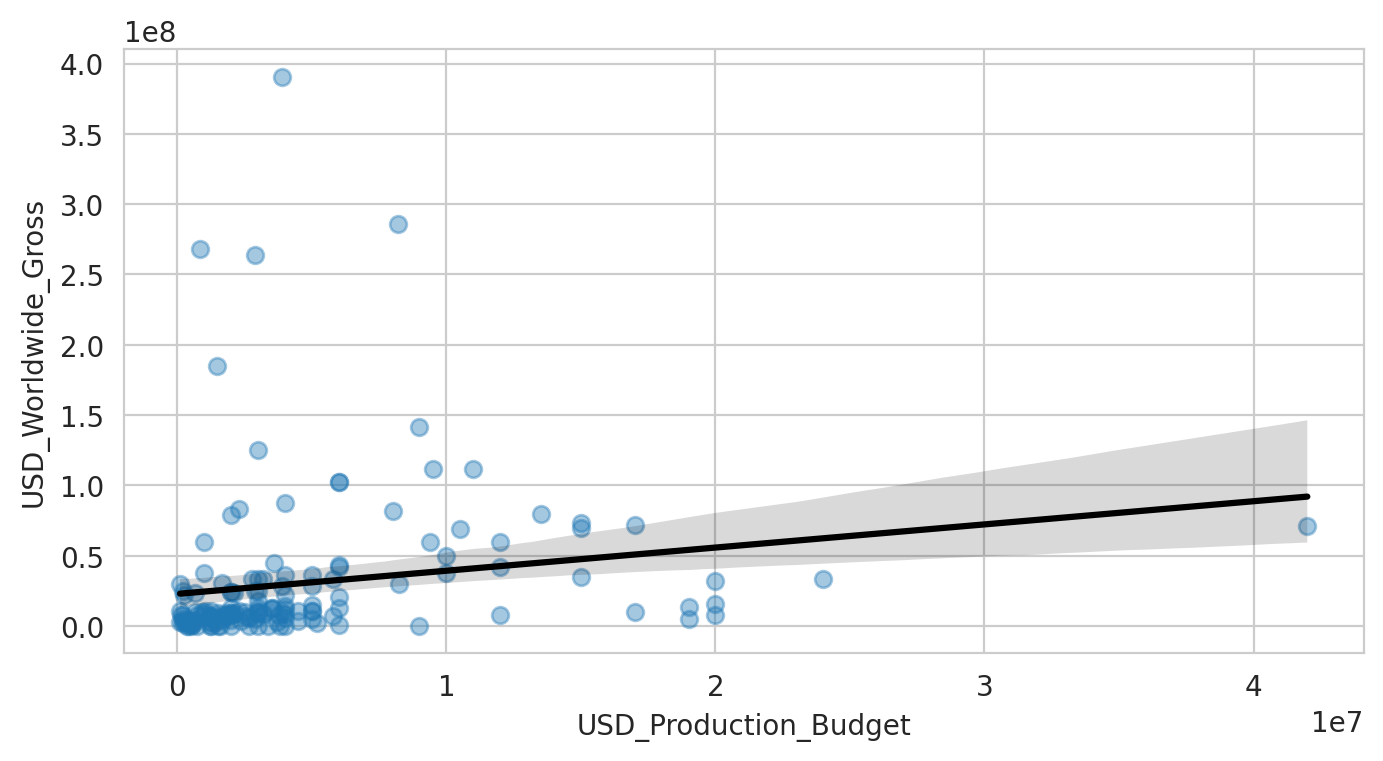

In [173]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

What do we see here? Well, first off we can spot Cleopatra on the far right. 
But also, we see that many lower budget films made much more money! 
The relationship between the production budget and movie revenue is not very strong. 
Many points on the left are very far away for the line, 
so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

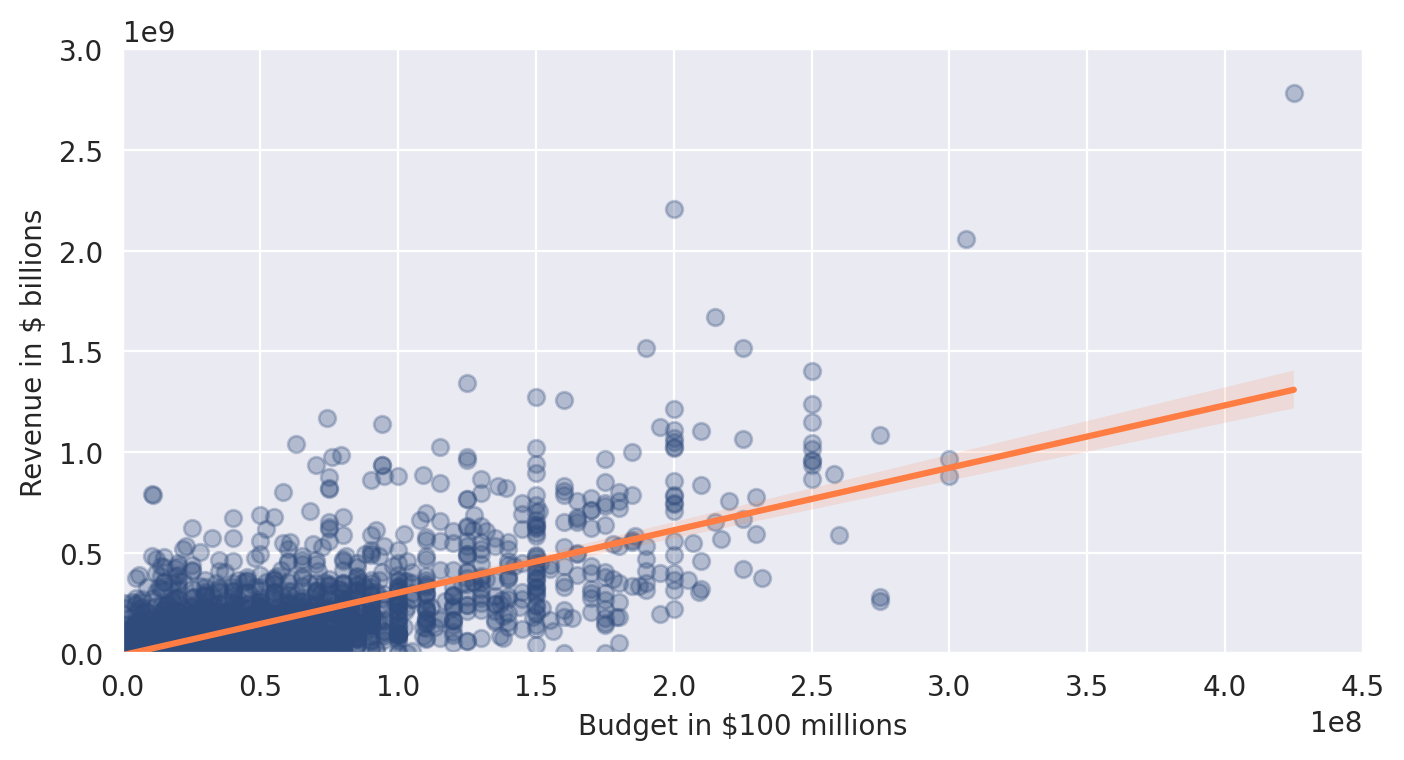

In [188]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and
that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect 
for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression 
model.



# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [190]:
regression = LinearRegression()

In [191]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 


Our LinearRegression does not like receiving Pandas Series 
(e.g., new_films.USD_Production_Budget),
so I've created some new DataFrames here.

In [192]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [193]:
#That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

#Theta-zero
regression.intercept_


array([-8338272.43659498])

In [194]:
#Theta-one
regression.coef_

array([[3.10151167]])

How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

In [196]:
#R-Squared: Goodness of Fit
# R-squared
#One measure of figuring out how well our model fits our data is by looking at a metric called r-squared.
#This is a good number to look at in addition to eyeballing our charts.
regression.score(X, y)


0.5529880674636849

We see that our r-squared comes in at around 0.558. 
This means that our model explains about 56% of the variance in movie revenue.
That's actually pretty amazing, considering we've got the simplest possible model, 
with only one explanatory variable. The real world is super complex, so in many academic circles,
if a researcher can build a simple model that explains over 50% or so of
what is actually happening, then it's a pretty decent model.

In [197]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 


In [198]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [199]:
#Theta-zero
regression.intercept_

array([22821538.63508038])

In [200]:
#Theta-one
regression.coef_

array([[1.64771314]])

In [201]:
regression.score(X, y)

0.02937258620576877

We see that our r-squared comes in at around 0.029. 
This means that our model explains about 3% of the variance in movie revenue.

#  Model to Make a Prediction
We just estimated the slope and intercept! Remember that our Linear Model has the following form:

𝑅𝐸𝑉𝐸̂ 𝑁𝑈𝐸=𝜃0+𝜃1𝐵𝑈𝐷𝐺𝐸𝑇
 

In [202]:
#For a $350 million budget film, our model predicts a worldwide revenue of around $600 million! 
#You can calculate this as follows:

22821538 + 1.64771314 * 350000000

#Or, using the regression object, you could also work it out like this:

budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')



The estimated revenue for a $350 film is around $600000000.0.
